# Brain Tumor MRI Classification

This notebook is about data analysis, class exploration, data augmentation. Tasks implemented are as follows:

1. Exploring class, class distribution, image size distribution for both training and testing dataset.
2. Performing necessary dimension reduction
3. Performing some Pre-processing tasks using Image processing techniques
4. Performing augmentation

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## About Training Dataset

Number of samples in each class in Training dataset:

No. of samples for class pituitary = 1457
No. of samples for class notumor = 1595
No. of samples for class meningioma = 1339
No. of samples for class glioma = 1321

Total training sample data: 5712

Number of samples percentage in each class in Training dataset:

No. of samples for class pituitary = 25.51
No. of samples for class notumor = 27.92
No. of samples for class meningioma = 23.44
No. of samples for class glioma = 23.13


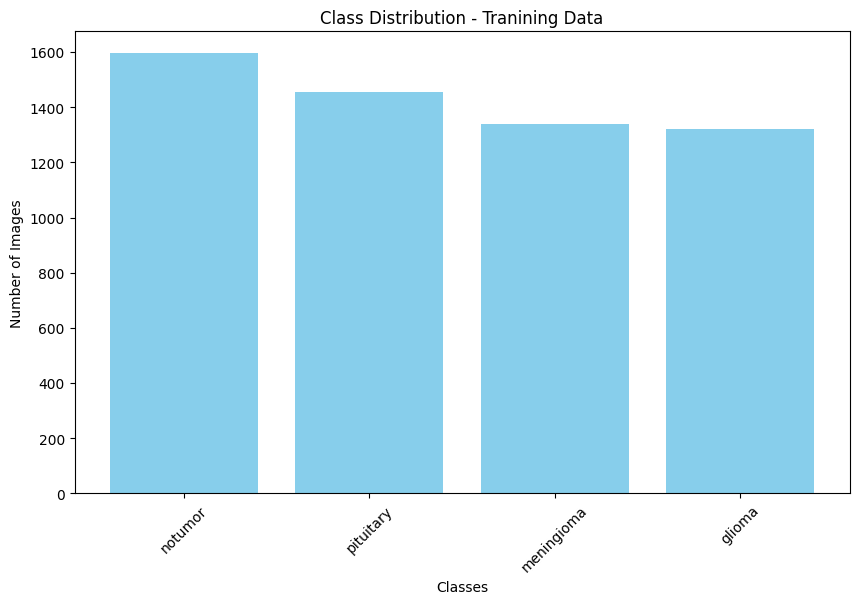

In [2]:
# Loading training dataset

path = '/kaggle/input/brain-tumor-mri-dataset/Training'

# Class distribution

class_sizes = {}
for class_folder in os.listdir(path):
    class_path = os.path.join(path, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_sizes[class_folder] = num_images

total_data = 0
print('Number of samples in each class in Training dataset:\n')
for x in class_sizes:
    total_data += class_sizes[x]
    print('No. of samples for class', x, '=', class_sizes[x])
print('\nTotal training sample data:', total_data)

print('\nNumber of samples percentage in each class in Training dataset:\n')
for x in class_sizes:
    print('No. of samples for class', x, '=', round(class_sizes[x]*100/total_data, 2))

# visualization - training samples

class_df = pd.DataFrame(list(class_sizes.items()), columns=['Class', 'Size'])
class_df = class_df.sort_values(by='Size', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(class_df['Class'], class_df['Size'], color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution - Tranining Data')
plt.xticks(rotation=45)
plt.show()

## About testing dataset

Number of samples in each class in Testing dataset:

No. of samples for class pituitary = 300
No. of samples for class notumor = 405
No. of samples for class meningioma = 306
No. of samples for class glioma = 300

Total testing sample data: 1311

Number of samples percentage in each class in Testing dataset:

No. of samples for class pituitary = 22.88
No. of samples for class notumor = 30.89
No. of samples for class meningioma = 23.34
No. of samples for class glioma = 22.88


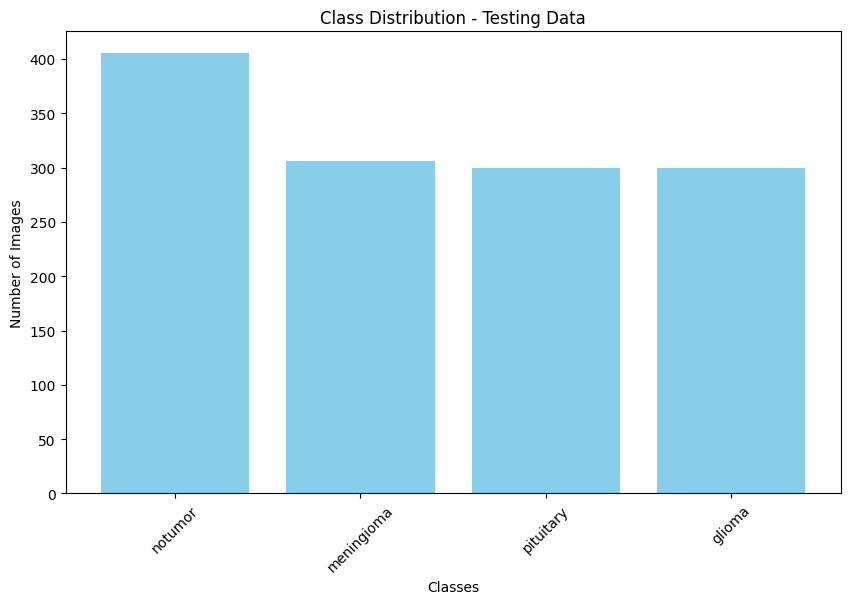

In [3]:
# Loading testing dataset

path = '/kaggle/input/brain-tumor-mri-dataset/Testing'

# Class distribution

class_sizes = {}
for class_folder in os.listdir(path):
    class_path = os.path.join(path, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_sizes[class_folder] = num_images

total_data = 0
print('Number of samples in each class in Testing dataset:\n')
for x in class_sizes:
    total_data += class_sizes[x]
    print('No. of samples for class', x, '=', class_sizes[x])
print('\nTotal testing sample data:', total_data)

print('\nNumber of samples percentage in each class in Testing dataset:\n')
for x in class_sizes:
    print('No. of samples for class', x, '=', round(class_sizes[x]*100/total_data, 2))

# visualization - training samples

class_df = pd.DataFrame(list(class_sizes.items()), columns=['Class', 'Size'])
class_df = class_df.sort_values(by='Size', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(class_df['Class'], class_df['Size'], color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution - Testing Data')
plt.xticks(rotation=45)
plt.show()

In [4]:
import plotly.express as px

def plot_size(root_path):

    # List to store file sizes and corresponding classes
    sizes = []
    classes = []

    # Iterating over each file in the root directory and its subdirectories
    for class_name in os.listdir(root_path):
        class_path = os.path.join(root_path, class_name)
        for dirpath, dirnames, filenames in os.walk(class_path):
            for filename in filenames:
                file_path = os.path.join(dirpath, filename)
                file_size = os.path.getsize(file_path)
                
                # Convert file size to MB and add to the list
                sizes.append(file_size / 1_000_000)
                classes.append(class_name)

    # Create a DataFrame
    data = {'File Size (MB)': sizes, 'Class': classes}

    # Create a histogram figure with plotly
    fig = px.histogram(data, x='File Size (MB)', color='Class', nbins=50, title="Distribution of Image Sizes by Class")

    fig.update_layout(
        yaxis_title="Number of Images",
        bargap=0.1,
        bargroupgap=0.1
    )

    fig.show()

## Distribution of Image sizes by class in training dataset

In [5]:
plot_size("/kaggle/input/brain-tumor-mri-dataset/Training")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


## Distribution of Image sizes by class in testing dataset

In [6]:
plot_size("/kaggle/input/brain-tumor-mri-dataset/Testing")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [7]:
def check_diff_rgb_vs_grayscale(image):
    
    # Splitting the image into RGB channels
    b, g, r = cv2.split(image)
    
    # Converting the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Plotting histograms for each channel
    plt.figure(figsize=(20, 3))
    plt.subplot(1, 4, 1)
    plt.hist(b.ravel(), bins=256, color='blue')
    plt.title('Blue Channel Histogram')
    plt.subplot(1, 4, 2)
    plt.hist(g.ravel(), bins=256, color='green')
    plt.title('Green Channel Histogram')
    plt.subplot(1, 4, 3)
    plt.hist(r.ravel(), bins=256, color='red')
    plt.title('Red Channel Histogram')
    plt.subplot(1, 4, 4)
    plt.hist(gray_image.ravel(), bins=256, color='gray')
    plt.title('Grayscale Image Histogram')
    plt.show()

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('RGB Image')
    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

## Histogram of RGB Channels and its corresponding grayscale images

The histograms obtained suggest that there may not be significant differences in the distribution of pixel values across the color channels. Therefore grayscale conversion of RGB images will be reasonable because of reduced complexity and improved generalization (as grayscale images contain illumination information only).

Checking for GLIOMA


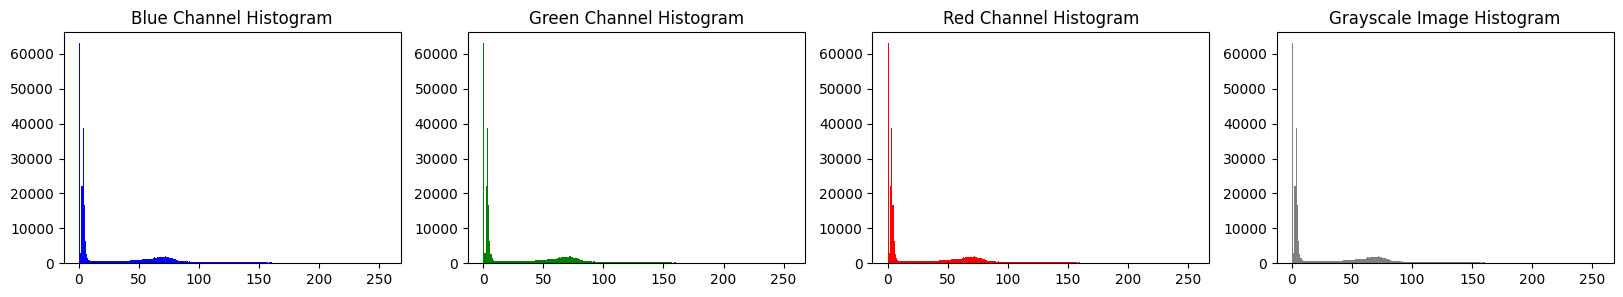

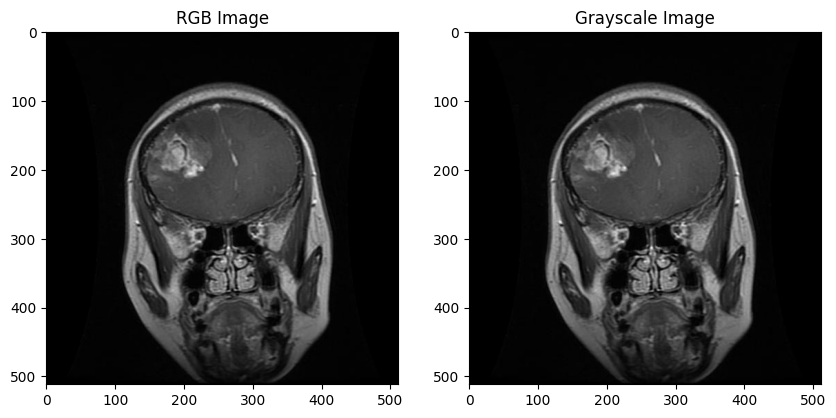

In [8]:
print('Checking for GLIOMA')
check_diff_rgb_vs_grayscale(cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0000.jpg'))

Checking for MENINGIOMA


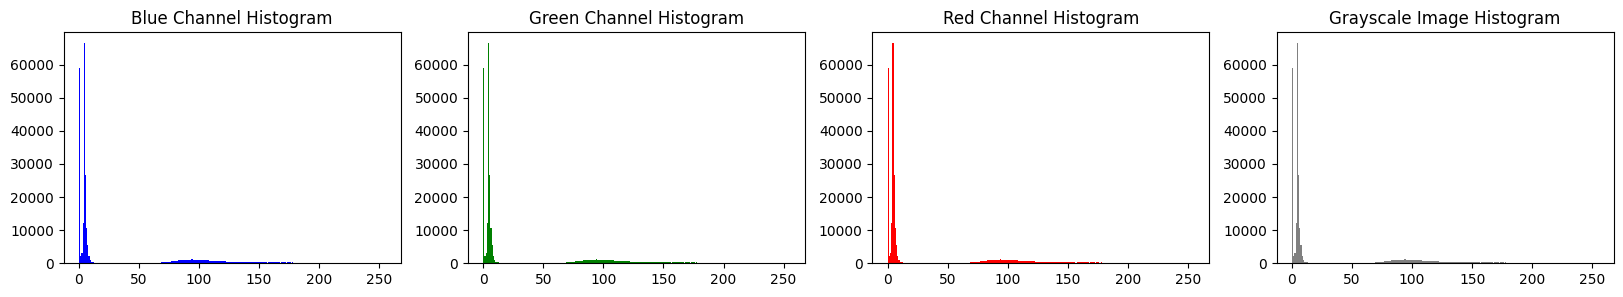

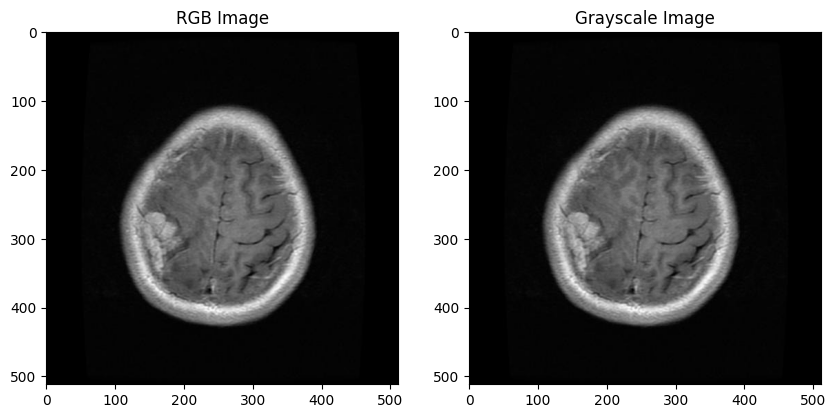

In [9]:
print('Checking for MENINGIOMA')
check_diff_rgb_vs_grayscale(cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0012.jpg'))

Checking for NO TUMOR


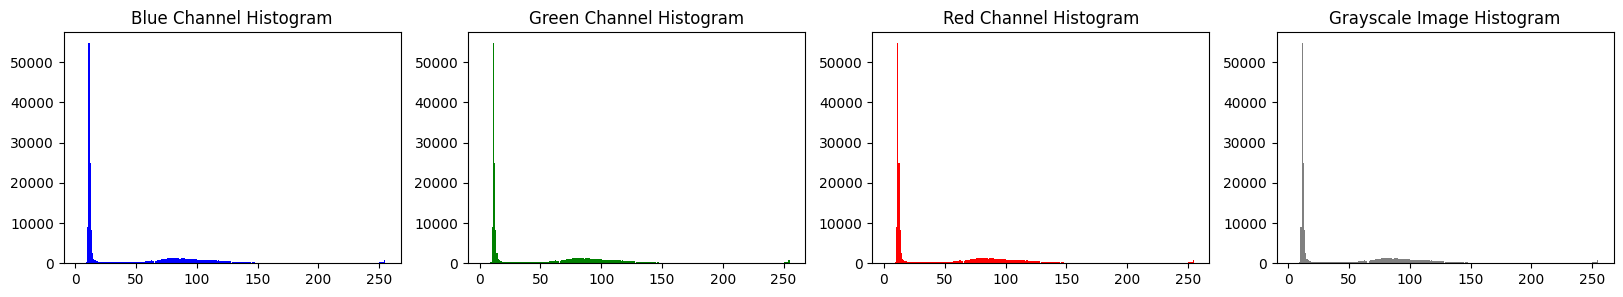

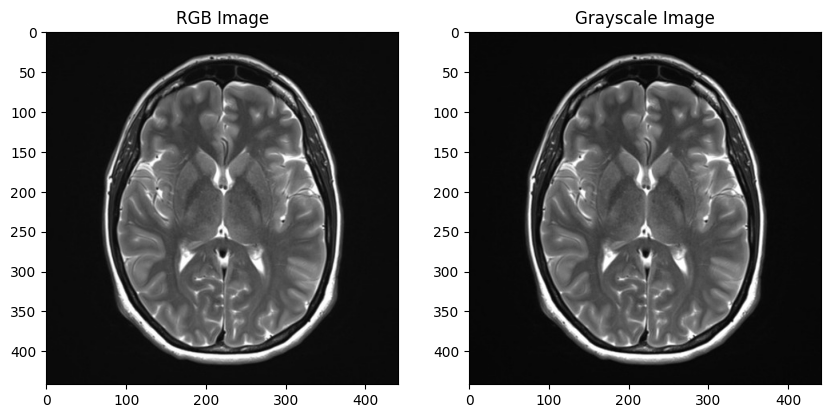

In [10]:
print('Checking for NO TUMOR')
check_diff_rgb_vs_grayscale(cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0017.jpg'))

Checking for PITUITARY


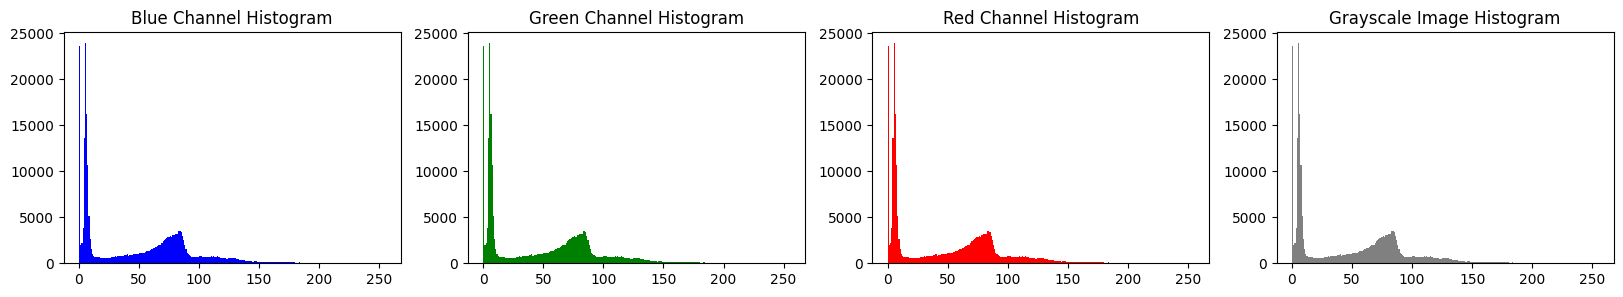

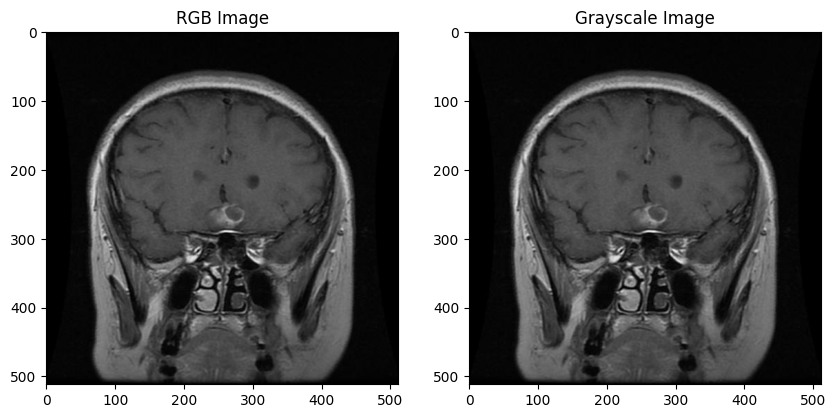

In [11]:
print('Checking for PITUITARY')
check_diff_rgb_vs_grayscale(cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-piTr_0009.jpg'))

# Pre-processing of images

1. Converting RGB images to Grayscale images
2. Cropping Images
3. Normalizing images
4. Resizing to 256 x 256

## Cropping Images include

1. Applying median filter with kernal size 3x3 - Noise handling
2. Binary thresholding - Segments black region
3. Contour detection - finds contour in binary image
4. Largest contour selection
5. Bounding box calculation
6. Image cropping

In [12]:
def crop_image(image):
    # Median filter to remove noise
    image_filtered = cv2.medianBlur(image, 3)
    
    # Binary thresholding to segment black regions
    _, thresh = cv2.threshold(image_filtered, 1, 255, cv2.THRESH_BINARY)
    
    # Finding contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Finding the contour with the largest area
    max_contour = max(contours, key=cv2.contourArea)
    
    # Getting the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(max_contour)
    
    # Cropping the image using the bounding box
    cropped_image = image[y:y+h, x:x+w]
    return cropped_image

def preprocess_image(file_path):
    
    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cropped_image = crop_image(gray_image)
    
    # Normalize image
    normalized_image = cropped_image / 255.0
    
    # Resize image
    resized_image = cv2.resize(normalized_image, (256, 256)) 
    input_image = np.expand_dims(resized_image, axis=-1)
    return input_image

# Comparing RGB Image and corresponding pre-processed images

(-0.5, 255.5, 255.5, -0.5)

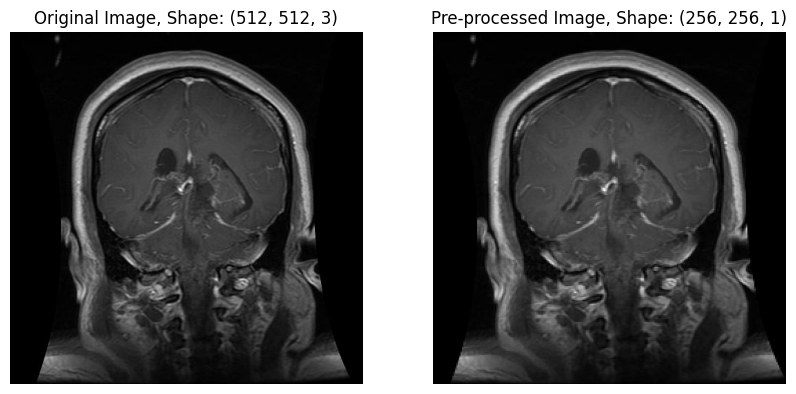

In [13]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0028.jpg')
preprocessed = preprocess_image('/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0028.jpg')
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image, Shape: {}'.format(img.shape))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(preprocessed, cmap='gray')
plt.title('Pre-processed Image, Shape: {}'.format(preprocessed.shape))
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

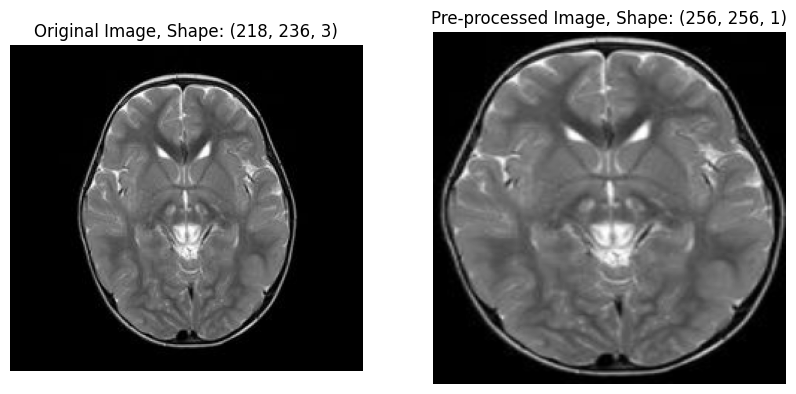

In [14]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0042.jpg')
preprocessed = preprocess_image('/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0042.jpg')
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image, Shape: {}'.format(img.shape))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(preprocessed, cmap='gray')
plt.title('Pre-processed Image, Shape: {}'.format(preprocessed.shape))
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

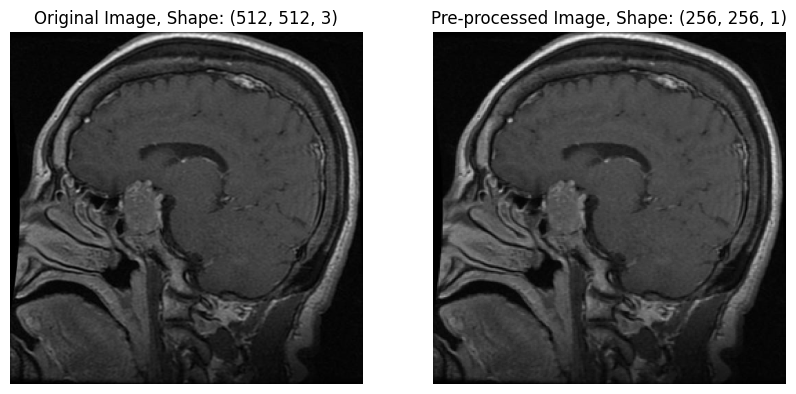

In [15]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0059.jpg')
preprocessed = preprocess_image('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0059.jpg')
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image, Shape: {}'.format(img.shape))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(preprocessed, cmap='gray')
plt.title('Pre-processed Image, Shape: {}'.format(preprocessed.shape))
plt.axis('off')

# Original Image vs Pre-processed image

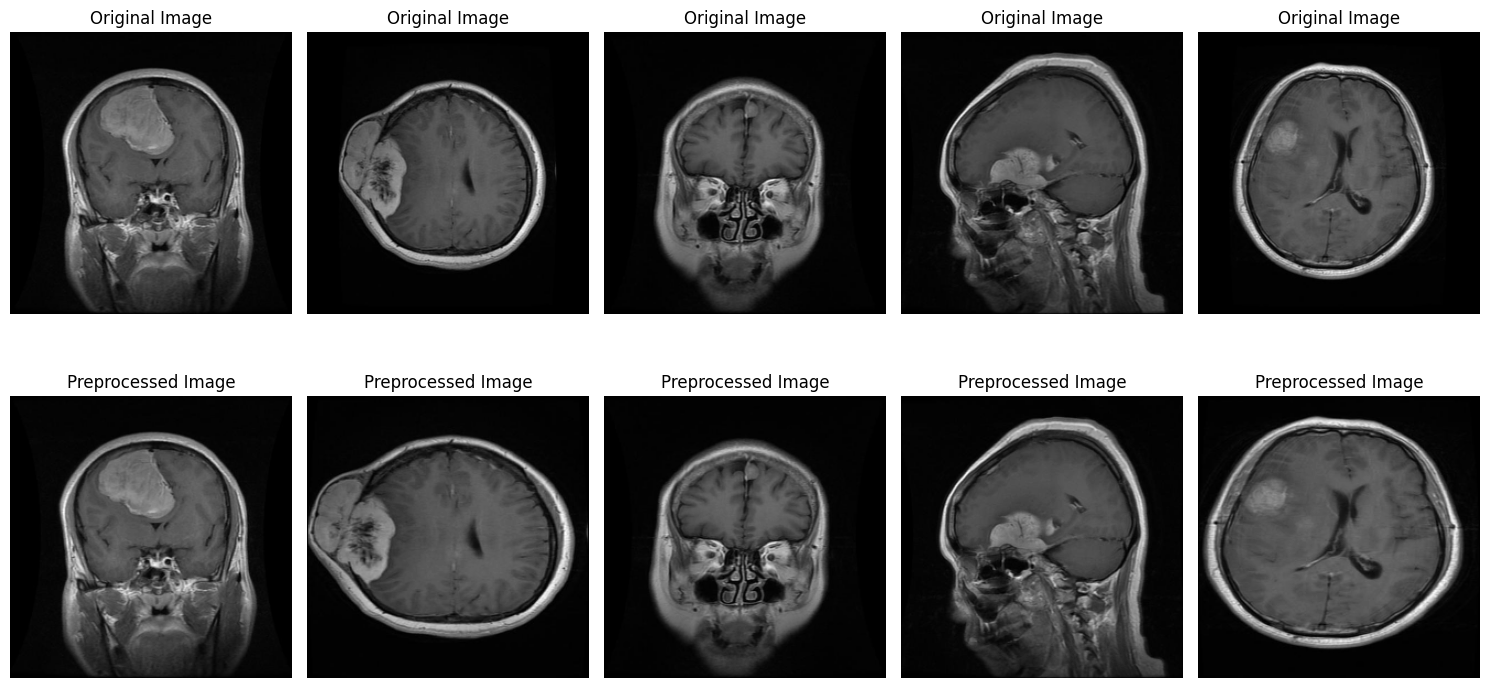

In [16]:
folder_path = '/kaggle/input/brain-tumor-mri-dataset/Training/meningioma'

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

# Displaying subplots for five different images
plt.figure(figsize=(15, 8))

for i in range(5):
    img = cv2.imread(image_files[i])
    preprocessed = preprocess_image(image_files[i])
    
    # Plot original image
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot preprocessed image
    plt.subplot(2, 5, i+6)
    plt.imshow(preprocessed.squeeze(), cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Dimension reduction

In [17]:
original = 512*512*3
grayscale = 256*256
reduction = round((original - grayscale)*100/original, 2)

print('Dimension Reduction from {} to {}'.format(original, grayscale))
print('Reduction Dimension: {}'.format(reduction))

Dimension Reduction from 786432 to 65536
Reduction Dimension: 91.67


# Creating new folder to stored all pre-processed training and testing images

In [18]:
from shutil import copyfile

input_folder = '/kaggle/input/brain-tumor-mri-dataset/Training'
output_folder = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training'

In [19]:
os.makedirs(output_folder, exist_ok=True)

In [20]:
for class_folder in os.listdir(input_folder):
    class_path = os.path.join(input_folder, class_folder)
    output_class_path = os.path.join(output_folder, class_folder)
    os.makedirs(output_class_path, exist_ok=True)
    
    # Loop through each image in the class folder
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(image_path)
        
        # Save the preprocessed image to the output class folder
        output_image_path = os.path.join(output_class_path, f'{class_folder}_{len(os.listdir(output_class_path))}.jpg')
        cv2.imwrite(output_image_path, preprocessed_image * 255.0)  # Multiply by 255 to convert back to 0-255 range

In [21]:
input_folder = '/kaggle/input/brain-tumor-mri-dataset/Testing'
output_folder = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing'
os.makedirs(output_folder, exist_ok=True)

In [22]:
for class_folder in os.listdir(input_folder):
    class_path = os.path.join(input_folder, class_folder)
    output_class_path = os.path.join(output_folder, class_folder)
    os.makedirs(output_class_path, exist_ok=True)
    
    # Loop through each image in the class folder
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(image_path)
        
        # Save the preprocessed image to the output class folder
        output_image_path = os.path.join(output_class_path, f'{class_folder}_{len(os.listdir(output_class_path))}.jpg')
        cv2.imwrite(output_image_path, preprocessed_image * 255.0)

In [23]:
import plotly.express as px
import os

def plot_size(root_path):

    sizes = []
    classes = []

    for class_name in os.listdir(root_path):
        class_path = os.path.join(root_path, class_name)
        for dirpath, dirnames, filenames in os.walk(class_path):
            for filename in filenames:
                file_path = os.path.join(dirpath, filename)
                file_size = os.path.getsize(file_path)
                sizes.append(file_size / 1_000_000)
                classes.append(class_name)

    data = {'File Size (MB)': sizes, 'Class': classes}

    fig = px.histogram(data, x='File Size (MB)', color='Class', nbins=50, title="Distribution of Image Sizes by Class after pre-processing")

    fig.update_layout(
        yaxis_title="Number of Images",
        bargap=0.1,
        bargroupgap=0.1
    )

    fig.show()

# Distribution of Image sizes by class after pre-processing training dataset

In [24]:
plot_size("/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Distribution of Image sizes by class after pre-processing testing dataset

In [25]:
plot_size("/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Checking augmented images for original image for different affine transformations

2024-05-12 13:01:11.020768: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 13:01:11.020917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 13:01:11.184503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


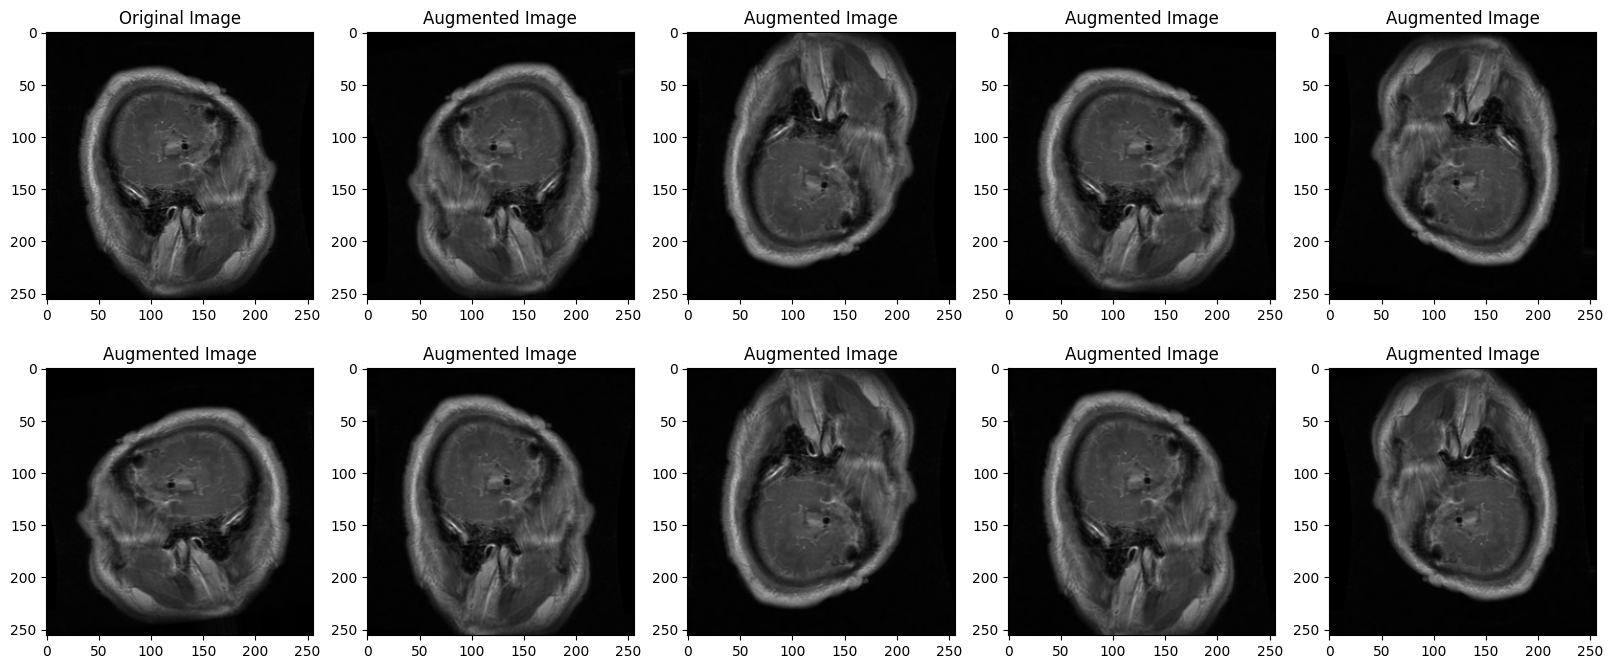

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# load the image
img = load_img('/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training/glioma/glioma_0.jpg')

plt.figure(figsize=(20, 8))
plt.subplot(2,5,1)
plt.imshow(img)
plt.title('Original Image')

# convert to numpy array
data = img_to_array(img)

samples = np.expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=10,
                            zoom_range=0.1,
                            fill_mode="nearest",
                            horizontal_flip=True,
                            vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot

for i in range(9):
    
    # generate batch of images
    batch = next(it)
    
    # convert to unsigned integers for viewing
    image = batch.astype('uint8')
    
    plt.subplot(2,5,i+2)
    plt.imshow(image.squeeze())
    plt.title('Augmented Image')

plt.show()

# Creating separate training and testing folder which will store generated images

In [27]:
output_folder = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training_Augmented'
os.makedirs(output_folder, exist_ok=True)

output_folder = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing_Augmented'
os.makedirs(output_folder, exist_ok=True)

In [28]:
output_folder = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training_Augmented/meningioma'
os.makedirs(output_folder, exist_ok=True)

output_folder = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training_Augmented/glioma'
os.makedirs(output_folder, exist_ok=True)

output_folder = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training_Augmented/pituitary'
os.makedirs(output_folder, exist_ok=True)

output_folder = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing_Augmented/meningioma'
os.makedirs(output_folder, exist_ok=True)

output_folder = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing_Augmented/glioma'
os.makedirs(output_folder, exist_ok=True)

output_folder = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing_Augmented/pituitary'
os.makedirs(output_folder, exist_ok=True)

# Augmentation code for training and testing dataset

In [29]:
import os
import random
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

def data_augmentation(original_dir, augmented_dir, required_img):
    
    os.makedirs(augmented_dir, exist_ok=True)

    # Randomly select 20 original images
    original_images = []
    for root, dirs, files in os.walk(original_dir):
        for file in files:
            if file.endswith('.jpg'):
                original_images.append(os.path.join(root, file))

    selected_original_images = random.sample(original_images, required_img)

    # Load each selected original image, generate 5 augmented images, and save them
    datagen = ImageDataGenerator(rotation_range=10,
                                 zoom_range=0.1,
                                 fill_mode="nearest",
                                 horizontal_flip=True,
                                 vertical_flip=True)

    for original_image_path in selected_original_images:
        img = load_img(original_image_path)
        data = img_to_array(img)
        samples = np.expand_dims(data, 0)

        # Generate and save 5 augmented images
        for i in range(5):
            it = datagen.flow(samples, batch_size=1)
            augmented_image = next(it).astype('uint8')

            # Save the augmented image
            original_image_name = os.path.basename(original_image_path)
            augmented_image_name = f'{original_image_name.split(".")[0]}_aug_{i+1}.jpg'
            augmented_image_path = os.path.join(augmented_dir, augmented_image_name)
            array_to_img(augmented_image[0]).save(augmented_image_path)

    print("Augmented images generated successfully.")

In [30]:
data_augmentation('/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training/pituitary', '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training_Augmented/pituitary', 20)

Augmented images generated successfully.


In [31]:
data_augmentation('/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training/glioma', '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training_Augmented/glioma', 40)

Augmented images generated successfully.


In [32]:
data_augmentation('/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training/meningioma', '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training_Augmented/meningioma', 40)

Augmented images generated successfully.


In [33]:
data_augmentation('/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing/pituitary', '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing_Augmented/pituitary', 20)
data_augmentation('/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing/glioma', '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing_Augmented/glioma', 20)
data_augmentation('/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing/meningioma', '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing_Augmented/meningioma', 16)

Augmented images generated successfully.
Augmented images generated successfully.
Augmented images generated successfully.


In [34]:
import plotly.express as px
import os

def plot_size(root_path, main_dir):

    sizes = []
    classes = []
    
    for subfolder in main_dir:
        subfolder_path = os.path.join(root_path, subfolder)
        for class_name in os.listdir(subfolder_path):
            class_path = os.path.join(subfolder_path, class_name)
            for dirpath, dirnames, filenames in os.walk(class_path):
                for filename in filenames:
                    file_path = os.path.join(dirpath, filename)
                    file_size = os.path.getsize(file_path)
                    sizes.append(file_size / 1_000_000)
                    classes.append(class_name)

    data = {'File Size (MB)': sizes, 'Class': classes}

    fig = px.histogram(data, x='File Size (MB)', color='Class', nbins=50, title="Distribution of Image Sizes by Class after pre-processing and augmentation")

    fig.update_layout(
        yaxis_title="Number of Images",
        bargap=0.1,
        bargroupgap=0.1
    )

    fig.show()

# Distribution of image sizes by class after pre-processing and augmentation - Training dataset

In [35]:
plot_size("/kaggle/working/Brain_Tumor_MRI_Image_Dataset", ['Training', 'Training_Augmented'])

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Distribution of image sizes by class after pre-processing and augmentation - Testing dataset

In [36]:
plot_size("/kaggle/working/Brain_Tumor_MRI_Image_Dataset", ['Testing', 'Testing_Augmented'])

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Plotting generated images

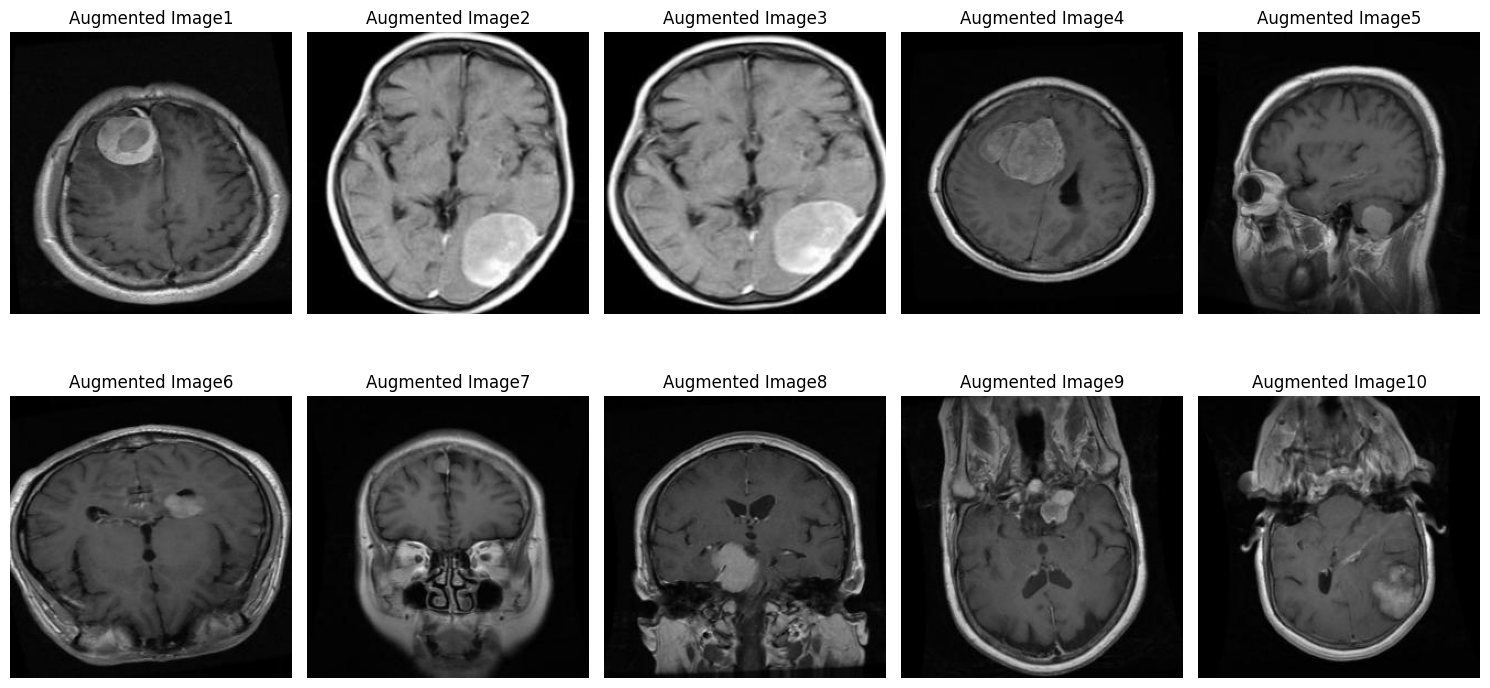

In [37]:
folder_path = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training_Augmented/meningioma'

image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

plt.figure(figsize=(15, 8))

for i in range(10):
    img = cv2.imread(image_files[i])
    preprocessed = preprocess_image(image_files[i])

    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Augmented Image' + str(i+1))
    plt.axis('off')

plt.tight_layout()
plt.show()

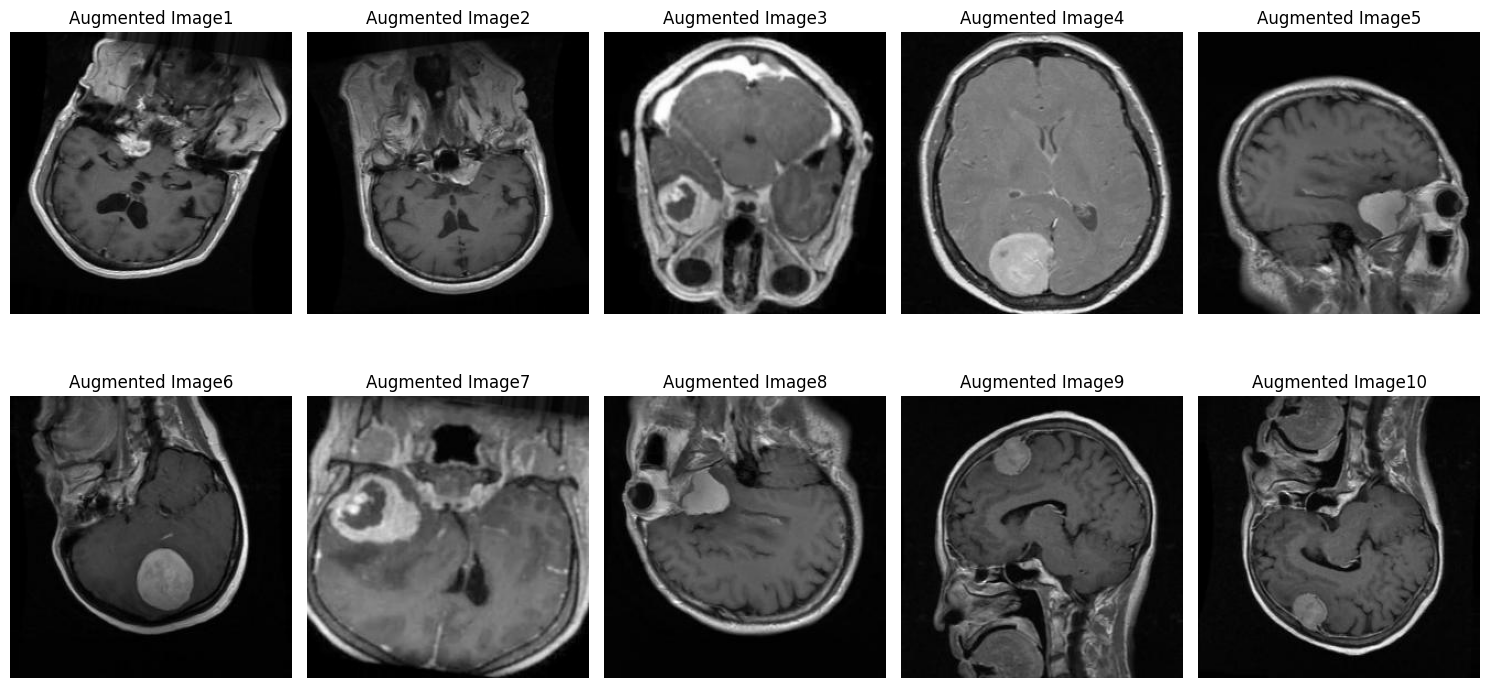

In [38]:
folder_path = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing_Augmented/meningioma'

image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

plt.figure(figsize=(15, 8))

for i in range(10):
    img = cv2.imread(image_files[i])
    preprocessed = preprocess_image(image_files[i])
    
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Augmented Image' + str(i+1))
    plt.axis('off')

plt.tight_layout()
plt.show()

# Visualizing overall training dataset

Number of samples in each class in Overall Training dataset:

No. of samples for class notumor = 1595
No. of samples for class pituitary = 1557
No. of samples for class glioma = 1521
No. of samples for class meningioma = 1539

Total training sample data: 6212

Number of samples percentage in each class in Overall Training dataset:

No. of samples for class notumor = 25.68
No. of samples for class pituitary = 25.06
No. of samples for class glioma = 24.48
No. of samples for class meningioma = 24.77


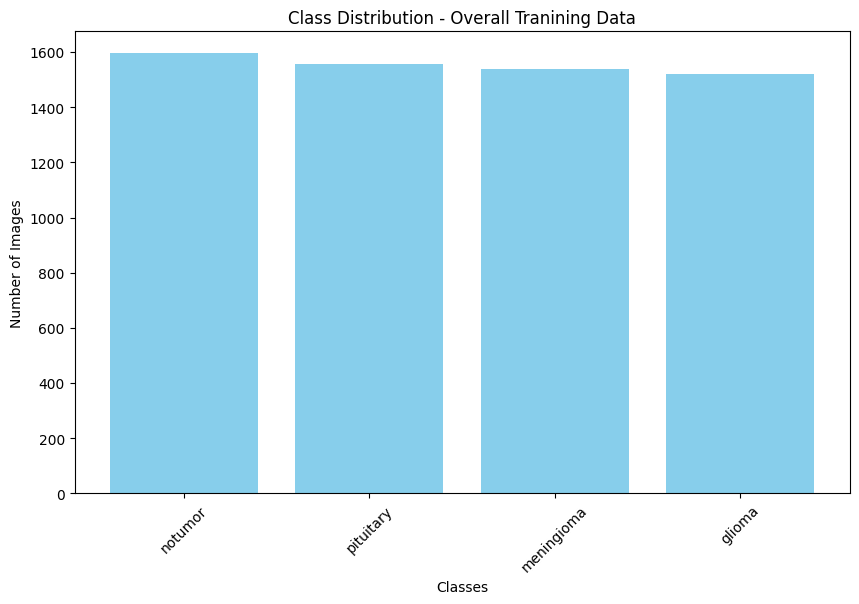

In [39]:
# Loading training dataset

path = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training'

# Class distribution

class_sizes = {}
for class_folder in os.listdir(path):
    class_path = os.path.join(path, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_sizes[class_folder] = num_images

path = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Training_Augmented'

for class_folder in os.listdir(path):
    class_path = os.path.join(path, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        if class_folder in class_sizes:
            class_sizes[class_folder] += num_images
        else:
             class_sizes[class_folder] = num_images

total_data = 0
print('Number of samples in each class in Overall Training dataset:\n')
for x in class_sizes:
    total_data += class_sizes[x]
    print('No. of samples for class', x, '=', class_sizes[x])
print('\nTotal training sample data:', total_data)

print('\nNumber of samples percentage in each class in Overall Training dataset:\n')
for x in class_sizes:
    print('No. of samples for class', x, '=', round(class_sizes[x]*100/total_data, 2))

# visualization - training samples

class_df = pd.DataFrame(list(class_sizes.items()), columns=['Class', 'Size'])
class_df = class_df.sort_values(by='Size', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(class_df['Class'], class_df['Size'], color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution - Overall Tranining Data')
plt.xticks(rotation=45)
plt.show()

# Visualizing overall testing dataset

Number of samples in each class in Overall Testing dataset:

No. of samples for class notumor = 405
No. of samples for class pituitary = 400
No. of samples for class glioma = 400
No. of samples for class meningioma = 386

Total training sample data: 1591

Number of samples percentage in each class in Overall Testing dataset:

No. of samples for class notumor = 25.46
No. of samples for class pituitary = 25.14
No. of samples for class glioma = 25.14
No. of samples for class meningioma = 24.26


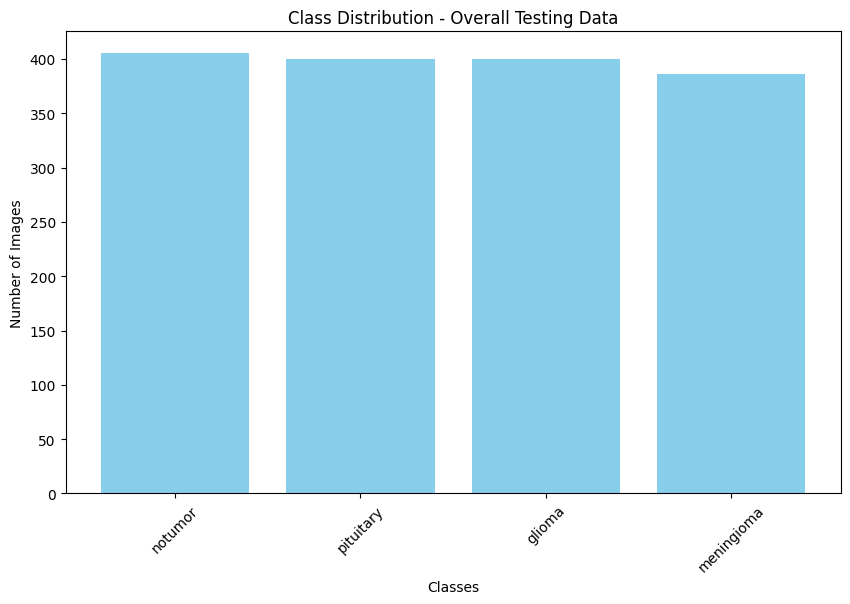

In [40]:
# Loading training dataset

path = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing'

# Class distribution

class_sizes = {}
for class_folder in os.listdir(path):
    class_path = os.path.join(path, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_sizes[class_folder] = num_images

path = '/kaggle/working/Brain_Tumor_MRI_Image_Dataset/Testing_Augmented'

for class_folder in os.listdir(path):
    class_path = os.path.join(path, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        if class_folder in class_sizes:
            class_sizes[class_folder] += num_images
        else:
             class_sizes[class_folder] = num_images

total_data = 0
print('Number of samples in each class in Overall Testing dataset:\n')
for x in class_sizes:
    total_data += class_sizes[x]
    print('No. of samples for class', x, '=', class_sizes[x])
print('\nTotal training sample data:', total_data)

print('\nNumber of samples percentage in each class in Overall Testing dataset:\n')
for x in class_sizes:
    print('No. of samples for class', x, '=', round(class_sizes[x]*100/total_data, 2))

# visualization - training samples

class_df = pd.DataFrame(list(class_sizes.items()), columns=['Class', 'Size'])
class_df = class_df.sort_values(by='Size', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(class_df['Class'], class_df['Size'], color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution - Overall Testing Data')
plt.xticks(rotation=45)
plt.show()

In [44]:
import shutil

shutil.make_archive('/kaggle/working/Brain_Tumor_MRI_Image_Dataset', 'zip', '/kaggle/working')

'/kaggle/working/Brain_Tumor_MRI_Image_Dataset.zip'